# Project Description

Our goal for this project is to create a program that synthesizes and graphs biological data to model how COVID-19 death rates compare between liberal and conservative states over the span of a year. During the COVID-19 pandemic, all of our team members noticed that there was a lot of political discussion over handling the spread of the coronavirus. As qualified voters ourselves, we recognize that the political split between Democratic-dominant(blue) states and Republican-dominant(red) states creates a divide in opinions regarding many national issues, especially pandemic response efforts. For example, some states imposed more restrictions such as masking mandates, stay-at-home orders, and vaccine mandates while other states chose to take more lenient approaches to please the majority in the dominant party. Each state’s plans affected their death rates differently. Due to this, it took each state varying time and effort to open up its economy. Given all of our interest in exploring this topic, we wanted to see if there is indeed an observable difference in health outcomes given the different measures imposed by either sides. In order to test our hypothesis and satisfy our curiosity, we decided to use a dataset that includes the number of deaths every day in the month from March 2020 to March 2021 in each of the 50 states. Through this project, we hope to showcase the impact politics can have on the people and communities during COVID-19 pandemic. 

## Team Member Names and Contributions
Team Members: Annie Hoang, YingLin Zhu, and Jose Falconi-cavallini

See PDF Notebook for specific contributions.

## Map of Red States and Blue States in the U.S. (2022)

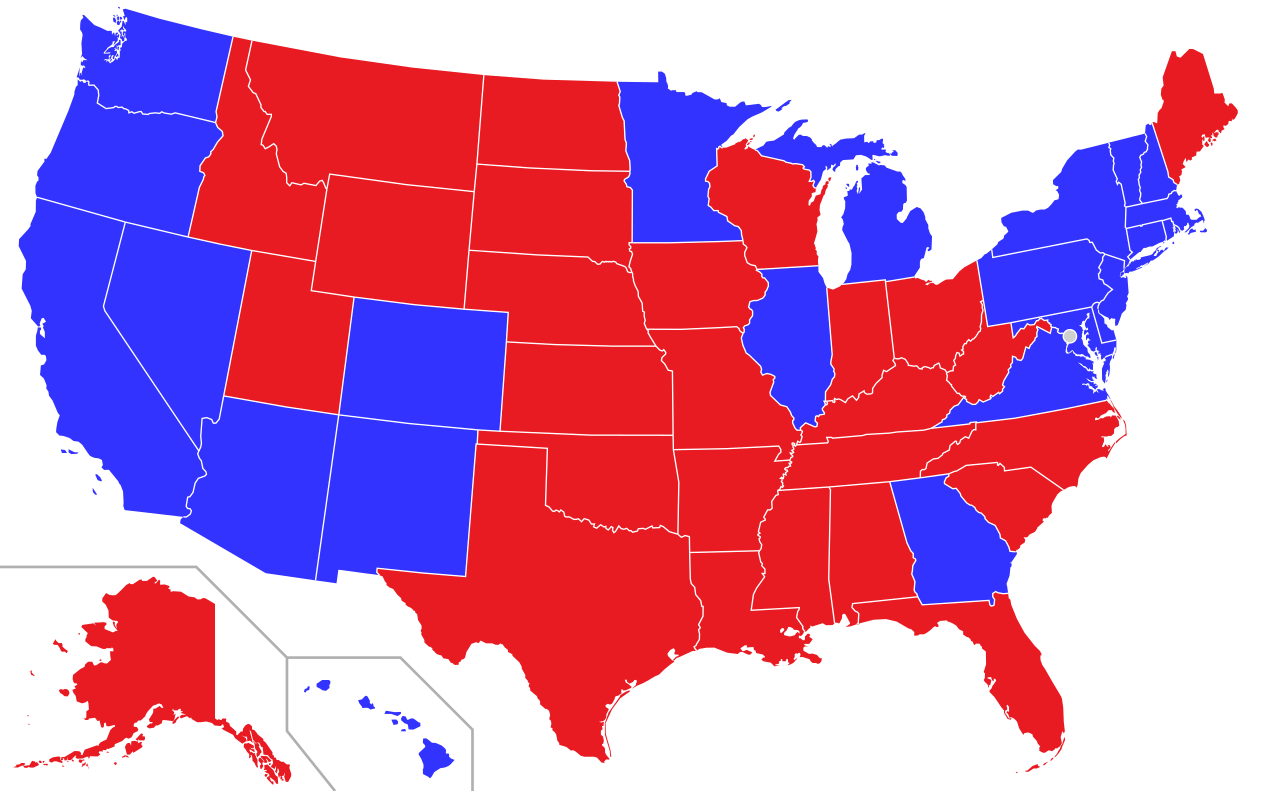

Citation: “Red States and Blue States.” Wikipedia, Wikimedia Foundation, 2 Dec. 2022, https://en.wikipedia.org/wiki/Red_states_and_blue_states#/media/File:Most_recent_senate_election.svg.

|Red States(27) |Blue States (23)
:---- | :--
|Alabama (AL) | Arizona (AZ)
|Alaska (AK) |California (CA)
|Arkansas (AR) |Colorado (CO)
|Florida (FL) |Conneticut (CT)
|Idaho (ID) |Delaware (DE)
|Indiana (IN) |Georgia (GA)
|Iowa (IA) |Hawaii (HI)
|Kansas (KS) |Illinois (IL)
|Kentucky (KY) | Maryland (MD)
|Louisiana (LA)  | Massachusetts (MA)
|Maine (ME) |Michigan (MI)
|Mississippi (MS) |Minnesota (MN)
|Missouri (MO) |Nevada (NV)
|Montana (MT) |New Hampshire (NH)
|Nebraska (NE) |New Jersey (NJ)
|North Carolina (NC) |New Mexico (NM)
|North Dakota (ND) |New York (NY)
|Ohio (OH) |Oregon (OR)
|Oklahoma (OK) | Pennsylvania (PA)
|South Carolina (SC) |Rhode Island (RI)
|South Dakota (SD) |Vermont (VT)
|Tennessee (TN) |Virginia (VA)
|Texas (TX) |Washington (WA)
|Utah (UT) |
|West Virginia (WV) |
|Wisconsin (WI) |
|Wyoming (WY) |

In [ ]:
red_list = ['Alabama', 
            'Alaska', 
            'Arkansas', 
            'Florida', 
            'Idaho', 
            'Indiana',
            'Iowa', 
            'Kansas', 
            'Kentucky', 
            'Louisiana', 
            'Maine', 
            'Mississippi', 
            'Missouri', 
            'Montana', 
            'Nebraska', 
            'North Carolina', 
            'North Dakota', 
            'Ohio', 'Oklahoma', 
            'South Carolina', 
            'South Dakota', 
            'Tennessee', 
            'Texas', 
            'Utah', 
            'West Virginia', 
            'Wisconsin', 
            'Wyoming']
blue_list = ['Arizona',
            'California',
            'Colorado',
            'Conneticut',
            'Delaware',
            'Georgia',
            'Hawaii',
            'Illinois',
            'Maryland',
            'Massachusetts',
            'Michigan',
            'Minnesota',
            'Nevada',
            'New Hampshire',
            'New Jersey',
            'New Mexico',
            'New York',
            'Oregon',
            'Pennsylvania',
            'Rhode Island',
            'Vermont',
            'Virginia',
            'Washington']

In [23]:
import numpy as np
import matplotlib.pyplot as plt

import final_module
from final_module import dataFunctions

SyntaxError: invalid syntax (1031189860.py, line 2)

In [26]:
## ORIGINAL FORMAT ##
"""
Function Name: readFile
input: fileName - path to file
output: data_list - a list of all the data except the header
"""
def readFile(fileName):
    
    '''reads the data file from the named state'''
    
    import numpy as np
    
    data = np.loadtxt(fileName,delimiter=',',dtype=str)
    data_list = []
    for i in range(1, len(data)):
        item = data[i]
        data_list.append(item)
    return data_list


"""
Function Name: simplifyData
input: data - country data with no header
output: reduced_data - simplified with only date, deaths
"""
def simplifyData(data):
    
    '''Gives user a random DNA strand from the list below'''

    reduced_data = []
    for item in data:
        reduced_data.append([item[0],item[2]])
    return reduced_data


"""
Function Name: sortData
input: data - reduced data with Dates, deaths, deathsIncrease
output: sorted_data - data sorted from 2020 to 2021
"""
def sortData(data):
    
    '''Gives user a random DNA strand from the list below'''
    
    sorted_data = []
    for i in range(len(data)-1, -1, -1):
        sorted_data.append(data[i])
    return sorted_data


"""
Function Name: createMonthlyAverage
input: data - sorted data with just data, deaths
output: monthly_data - data reduced to deaths per month
"""
def createMonthlyAverage(data):
    
    months = ["March","April","May","June","July","August","September","October","November","December","January","Febuary"]
    monthly_data = []
    current = 0
    current_death = data[0][1]
    oldMonth = data[0][0][6:8]
    
    for i in range(len(data)):
        item = data[i]
        currentMonth = item[0][6:8]
        
        if oldMonth == currentMonth:
            current_death = item[1]
        else:
            monthly_data.append([months[current],current_death])
            current += 1
            current_death = item[1]
            oldMonth = currentMonth
            
    return monthly_data
            
    
"""
Function Name: graphState
input: fileName - data path to file
       state - the name of state to show on graph
output: montlyAverages is returned which is deaths for each month times 1000
        the function also plots the graph of each state
"""
def graphState(fileName, state, pop):
    months = ["Mar","Apr","May","June","July","Aug","Sept","Oct","Nov","Dec","Jan","Feb"]
    data = readFile(fileName)
    data = simplifyData(data)
    data = sortData(data)
    data = createMonthlyAverage(data)
    monthlyAverages = []
    
    for i in data:
        num = i[1]
        if num == '':
            num = '0'
        monthlyAverages.append(int(num)/pop)
        
    import matplotlib.pyplot as plt 
    
    plt.plot(monthlyAverages)
    plt.xlabel('Month')
    plt.ylabel('Deaths Per 100,000 People')
    plt.title(state + " Covid Deaths Per 100,000 People")
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], months)
    plt.show()
    return monthlyAverages

"""
Function: calculateAverageOfStates
input: stateList - list of all red/blue states
output: avgList - average of all deaths for each month
"""
def calculateAverageOfStates(stateList):
    avgList = []
    total = len(stateList)
    
    for i in range(len(stateList[0])):
        
        current = 0
        for state in stateList:
            current += state[i]
        avgList.append(current / total)
        
    return avgList
        
        
"""
Function: graphRBStates
input: stateAvgList - list of all the states average deaths
       stateColor - title for plot red or blue states
output: nothing returned, plots graph
"""        
def graphRBStates(stateAvgList, stateColor):
    months = ["Mar","Apr","May","June","July","Aug","Sept","Oct","Nov","Dec","Jan","Feb"]
    plt.plot(stateAvgList)
    plt.xlabel('Month')
    plt.ylabel('Deaths x 1000')
    plt.title(stateColor + " Covid Deaths")
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], months)
    plt.show()

## Calculating the Average Death/100,000 Per Month for Red States

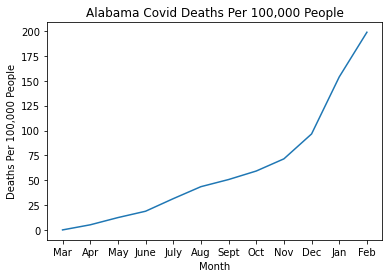

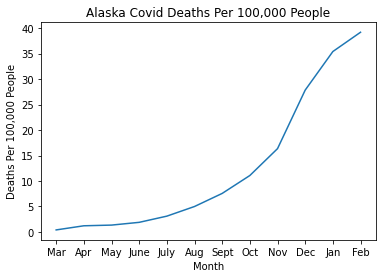

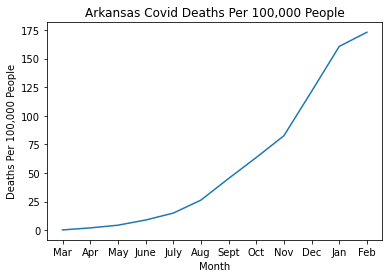

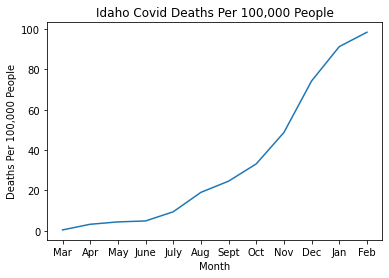

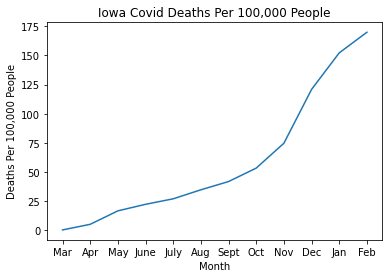

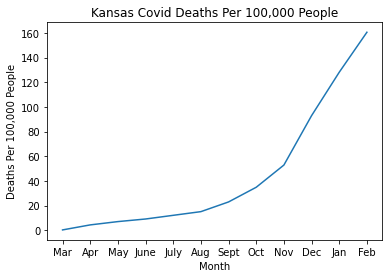

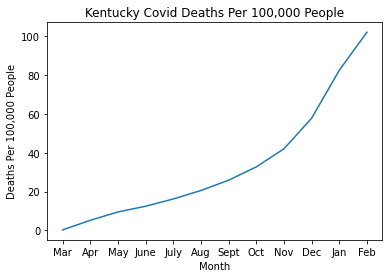

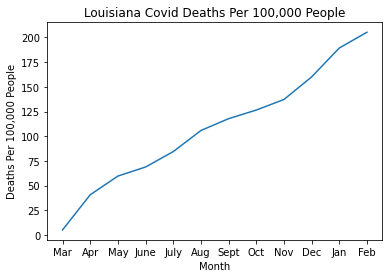

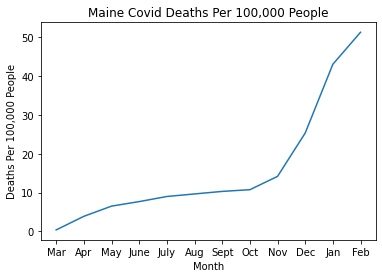

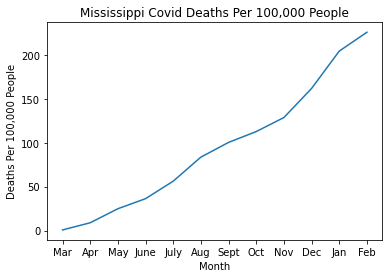

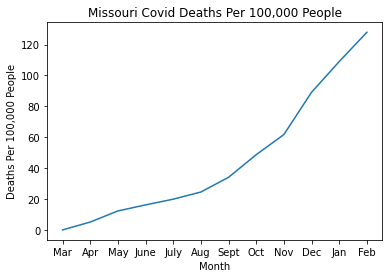

In [28]:
#Red_States = [AL, AK, AR, FL, ID, IN, IA, KS, KY, LA, ME, MS, MO, MT, NE, NC, ND, OH, OK, SC, SD, TN, TX, UT, WV, WI, WY]

AL = graphState("./states/alabama-history.csv", "Alabama", 50)
AK = graphState("./states/alaska-history.csv", "Alaska", 7.4)
AR = graphState("./states/arkansas-history.csv", "Arkansas", 30.3)
#FL = graphState("./states/florida-history.csv", "Florida", 220.8)
ID = graphState("./states/idaho-history.csv", "Idaho", 18.9)
#IN = graphState("./states/indiana-history.csv", "Indiana", 68.4)
IA = graphState("./states/iowa-history.csv", "Iowa", 32.2)
KS = graphState("./states/kansas-history.csv", "Kansas", 29.5)
KY = graphState("./states/kentucky-history.csv", "Kentucky", 45.4)
LA = graphState("./states/louisiana-history.csv", "Louisiana", 46.8)
ME = graphState("./states/maine-history.csv", "Maine", 13.7)
MS = graphState("./states/mississippi-history.csv", "Mississippi", 29.6)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MT = graphState("./states/montana-history.csv", "Montana", #)
NE = graphState("./states/nebraska-history.csv", "Nebraska", #)
NC = graphState("./states/north-carolina-history.csv", "North Carolina", #)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
MO = graphState("./states/missouri-history.csv", "Missouri", 61.9)
#_Data = graphState("./states/-history.csv", "")


## Calculating Average Death/100,000 Per Month for Blue States

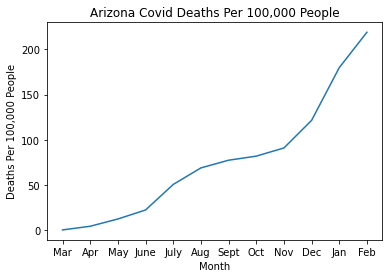

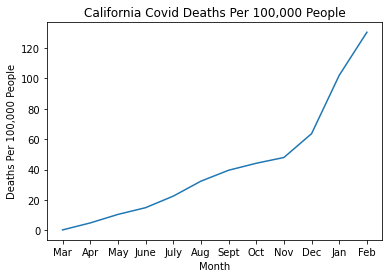

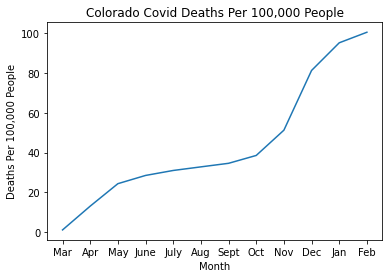

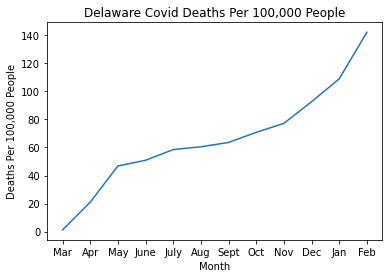

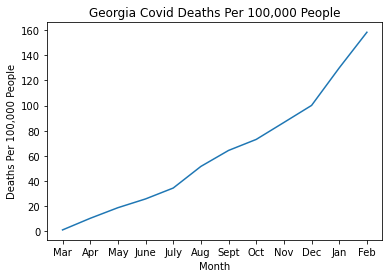

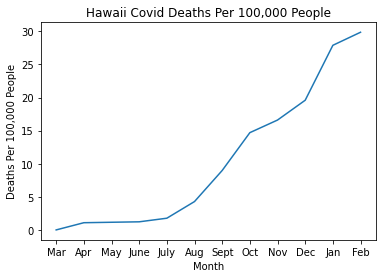

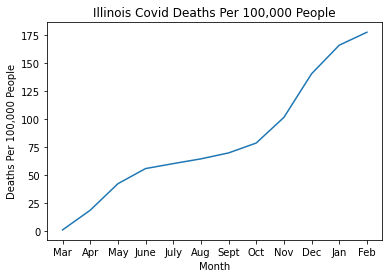

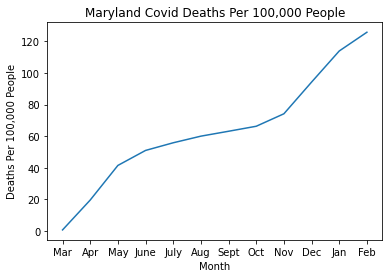

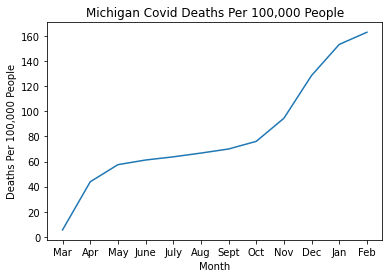

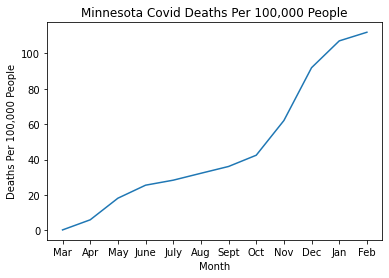

TypeError: graphState() missing 1 required positional argument: 'pop'

In [29]:
#Blue_States = [AZ, CA, CO, CT, DE, GA, HI, IL, MD, MA, MI, MN, NV, NH, NJ, NM, NY, OR, PA, RI, VT, VA, WA]
AZ = graphState("./states/arizona-history.csv", "Arizona", 73)
CA = graphState("./states/california-history.csv", "California", 399)
CO = graphState("./states/colorado-history.csv", "Colorado", 59.2)
#CT = graphState("./states/connecticut-history.csv", "Connecticut", 36.1)
DE = graphState("./states/delaware-history.csv", "Delaware", 10)
GA = graphState("./states/georgia-history.csv", "Georgia", 109.2)
HI = graphState("./states/hawaii-history.csv", "Hawaii", 14.7)
IL = graphState("./states/illinois-history.csv", "Illinois", 128)
MD = graphState("./states/maryland-history.csv", "Maryland", 62.6)
#MA = graphState("./states/massachusetts-history.csv", "Massachusetts", 71.3)
MI = graphState("./states/michigan-history.csv", "Michigan", 101.2)
MN = graphState("./states/minnesota-history.csv", "Minnesota", 57.9)
NV = graphState("./states/nevada-history.csv", "Nevada")
NH = graphState("./states/new-hampshire-history.csv", "New Hampshire")
NJ = graphState("./states/new-jersey-history.csv", "New Jersey")
NM = graphState("./states/new-mexico-history.csv", "New Mexico")
NY = graphState("./states/new-york-history.csv", "New York")
OR = graphState("./states/oregon-history.csv", "Oregon")
PA = graphState("./states/pennsylvania-history.csv", "Pennsylvania")
RI = graphState("./states/rhode-island-history.csv", "Rhode Island")
VT = graphState("./states/vermont-history.csv", "Vermont")
VA = graphState("./states/virginia-history.csv", "Virginia")
WA = graphState("./states/washington-history.csv", "Washington")

## Average Death Rate For Red vs Blue States

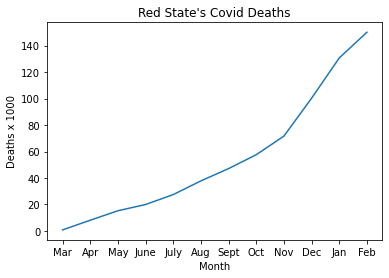

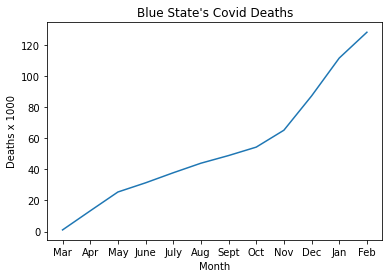

In [93]:
redStatesAverage = calculateAverageOfStates(Red_States)
blueStatesAverage = calculateAverageOfStates(Blue_States)

graphRBStates(redStatesAverage, "Red State's")
graphRBStates(blueStatesAverage, "Blue State's")